El motivo de este notebook es desarrollar numericamente lo encontrado en el paper

    The Kronig-Penney model extended to arbitrary potentials via numerical matrix mechanics
        R. L. Pavelich and F. Marsiglio
    
Primero intentando reproducir los resultados para un potencial tipo escalon periódico, es decir el modelo de Kronig-Penny.


**Todas la ecuaciones, conjunto de base y demás se hacen referencia al paper**

## Teoría general
Retomando la forma de escribir cualquier estado
$$|\psi \rangle = \sum_{m=1}^\infty c_m |\psi_m\rangle$$

Donde $|\psi_m\rangle$ es una base arbitraria del espacio de Hilbert donde vive la solución.

La ecuación de Schrödinger estacionaria para un Hamiltoniano $\hat H$ es:
$$\hat H |\psi_m\rangle = E|\psi_m\rangle$$

Expandiendo a $|\psi\rangle$ en sus elementos de la base $\left\{ |\psi_m\rangle \right\}$ tenemos la ecuación matricial

\begin{align}
\hat H \sum_{m=1}^\infty c_m |\psi_m\rangle &= E\sum_{m=1}^\infty c_m |\psi_m\rangle\\
\sum_{m=1}^\infty H_{nm} c_m &= E c_n
\end{align}

Donde
$$H_{nm} = \langle \psi_n | H |\psi_m\rangle$$

Notemos que si escribimos la forma funcional de $\hat H$ como
$$ \hat H = \frac{\hat p ^2}{2\mu} + \hat V(x) = \frac{-\hbar^2}{2\mu} \frac{d^2}{dx^2} + \hat V(x)$$
Donde $\mu$ es la masa de la partícula que queremos describir y $\hat V(x)$ el potencial externo.

$$H_{nm} = -\frac{\hbar^2}{2\mu}\langle \psi_n | \frac{d^2}{dx^2} |\psi_m\rangle + V_{nm}$$

Donde análogamente se define $V_{nm} = \langle \psi_n | V(x) |\psi_m\rangle$.

## Condiciones de frontera periodicas

Como vamos a tomar potenciales periodicos en el caso general, nos conviene considerar un dominio de $x$ que sea simétrico, $[-\frac{a}{2}, \frac{a}{2}]$, esto para simplificar las cuentas, y considerar la base del espacio como la base de Fourier dada por

$$ \psi_n(x) = \frac{1}{\sqrt{a}}e^{-i \frac{2\pi n}{a}x}$$

De esta forma los elementos $V_{nm}$ tienen la forma

\begin{align}
V_{nm} &= \frac{1}{a}\int_{-\frac{a}{2}}^\frac{a}{2} e^{-i \frac{2\pi n}{a}x} V(x) e^{i \frac{2\pi m}{a}x} dx\\
&= \frac{1}{a}\int_{-\frac{a}{2}}^\frac{a}{2}V(x) e^{-i \frac{2\pi (n-m)}{a}x} dx
\end{align}

*Por lo tanto podemos pensar al elemento $V_{nm}$ como el elemento $n-m$ de la serie de Fourier de $V(x)$*

Además el elemento $\langle \psi_n | \frac{d^2}{dx^2} |\psi_m\rangle$ se vuelve

\begin{align}
\langle \psi_n | \frac{d^2}{dx^2} |\psi_m\rangle &= \frac{1}{a}\int_{-\frac{a}{2}}^\frac{a}{2} e^{-i \frac{2\pi n}{a}x} \frac{d^2}{dx^2} e^{i \frac{2\pi m}{a}x} dx\\
&= \left(\frac{-4\pi^2 m^2}{a^2}\right)\frac{1}{a}\int_{-\frac{a}{2}}^\frac{a}{2} e^{-i \frac{2\pi n}{a}x} e^{i \frac{2\pi m}{a}x} dx\\
&= \frac{-4\pi^2 m^2}{a^2} \langle \psi_n |\psi_m\rangle\\
-\frac{\hbar^2}{2\mu}\langle \psi_n | \frac{d^2}{dx^2} |\psi_m\rangle &= \frac{2\pi^2 m^2\hbar^2}{\mu a^2} \delta_{nm} = 4\frac{\pi^2 n^2\hbar^2}{2\mu a^2} \delta_{nm} = 4n^2 E_0 \delta_{nm}
\end{align}

Por lo tanto podemos escribir $H_{nm}$ como
$$H_{nm} = 4n^2 E_0 \delta_{nm} + \frac{1}{a}\int_{-\frac{a}{2}}^\frac{a}{2}V(x) e^{-i \frac{2\pi (n-m)}{a}x} dx$$

Donde definimos $E_0$ como la energía del estado base de un pozo infinito de ancho $a$, 
$$E_0 = \frac{2\pi^2\hbar^2}{\mu a^2}$$

Si convertimos la expressión de $H_{nm}$ a una expressión adimensional, normalizando por $E_0$ tenemos

$$
h_{nm} = \frac{H_{nm}}{E_0} = 4n^2 \delta_{nm} + \frac{1}{a}\int_{-\frac{a}{2}}^\frac{a}{2}\frac{V(x)}{E_0} e^{-i \frac{2\pi (n-m)}{a}x} dx$$


## Matrix method for the Kronig-Penney model

Consideremos el potencial siguiente
$$V(x) = V_0 \sum_{n=-\infty}^{\infty} \theta[x-(na-b)]\theta[(n+1)a-x]$$

Donde la función $\theta$ es la función de Heaviside.

Ahora como este potencial es periódico, y utilizando el teorema de Bloch que nos dice que la función de onda de una partícula en un potencial periódico es de la forma:
$$\psi(x+a) = e^{iKa} \psi(x)$$
Donde $-\pi < Ka < \pi$

Este cambio modifica la base de funciones que tenemos que usar de la forma
$$\psi_n^{'}(x) = \frac{1}{\sqrt{a}}e^{i\frac{2\pi n +Ka}{a}}x = e^{iKx}\frac{1}{\sqrt{a}}e^{i\frac{2\pi n}{a}}x = e^{iKx} \psi_n(x)$$

Notemos que cuando calculemos los elementos de $h_{nm}$ fuera de la diagonal el término $e^{iKx}$ se va a cancelar. Este cambio sólo va afectar los elementos de la diagonal de la siguiente forma

$$h_{nn} = (2n+\frac{Ka}{\pi})^2 + v_{nn}$$

Donde 
$$v_{nn} = \frac{1}{a}\int_{-\frac{a}{2}}^\frac{a}{2}\frac{V(x)}{E_0} e^{-i 2\pi Kx} dx$$

Si consideramos el potencial anterior donde la altura de las barreras es $V_0$ y el ancho es $(a-b)/2$, tomando las variables $v_0 = V_0/E_0$ y $\rho = b/a$

Se llega a que los elementos $h_{nm}$ son

$$h_{nm} = \delta_{nm} \left[\left(2n+\frac{Ka}{\pi}\right)^2+v_0(1-\rho)\right]+ (1-\delta_{nm})v_0 \frac{(-1)^{m-n+1}}{\pi}\frac{\sin(\pi(m-n)\rho)}{m-n}$$

Para obtener el especto de energías en función de $K$ se diagonaliza la matriz $(h_{nm})$ para distintos valores de $K$.

In [1]:
import numpy as np
from numpy import linalg as LA
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
def Hamiltonian(N, K, v0, rho):
    h = np.zeros((2*N+1,2*N+1))
    for n in range(-N,N+1):
        for m in range(-N,N+1):
            if n==m:
                h[m,n] = (2*n+K)*(2*n+K) + v0*(1-rho)
            else:
                if (m-n+1)%2==0:
                    h[m,n] = v0*np.sin(np.pi*(m-n)*rho)/(np.pi*(m-n))
                else:
                    h[m,n] = -v0*np.sin(np.pi*(m-n)*rho)/(np.pi*(m-n))
    return h

def ParseKa(Ka_vals, N, v0, rho):
    Ka = np.linspace(-1, 1, Ka_vals)
    Eigenvals = np.zeros((Ka_vals, 2*N+1))
    for i in xrange(Ka_vals):
        H = Hamiltonian(N, Ka[i], v0, rho)
        Eigenvals[i] = LA.eigvalsh(H)
        
    Energies = np.zeros((2,(2*N+1)*Ka_vals))
    for j in xrange(2*N+1):
        for i in xrange(Ka_vals):
            Energies[:,i*(2*N+1)+j] = [Ka[i],Eigenvals[i,j]]
    return Energies

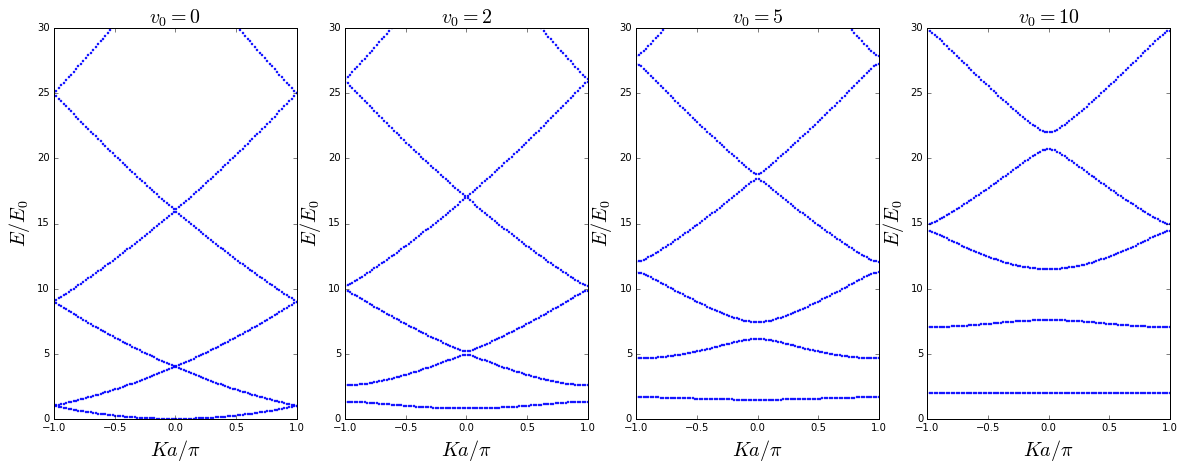

In [18]:
fig = figure(figsize=(20,7))
ax = fig.add_subplot(141)
bx = fig.add_subplot(142)
cx = fig.add_subplot(143)
dx = fig.add_subplot(144)

Ka_vals = 100
N = 10
rho = 0.5
v0s = [0, 2, 5, 10]

Energies = [np.zeros((Ka_vals, 2*N+1)), np.zeros((Ka_vals, 2*N+1)), 
            np.zeros((Ka_vals, 2*N+1)), np.zeros((Ka_vals, 2*N+1))]
graphs = [ax,bx,cx,dx]

for i in range(4):
    Energies[i] = ParseKa(Ka_vals, N, v0s[i], rho)
    graphs[i].plot(Energies[i][0,:], Energies[i][1,:], '.', markersize=4)
    graphs[i].set_title("$v_0 = "+str(v0s[i])+"$", fontsize=20)
    graphs[i].set_ylim(0,30)
    graphs[i].set_xlabel("$Ka/\pi$", fontsize=20)
    graphs[i].set_ylabel("$E/E_0$", fontsize=20)

Notemos como las bandas se de energía se vas separando según el parámetro $v_0$ que que es la profundidad del potencial

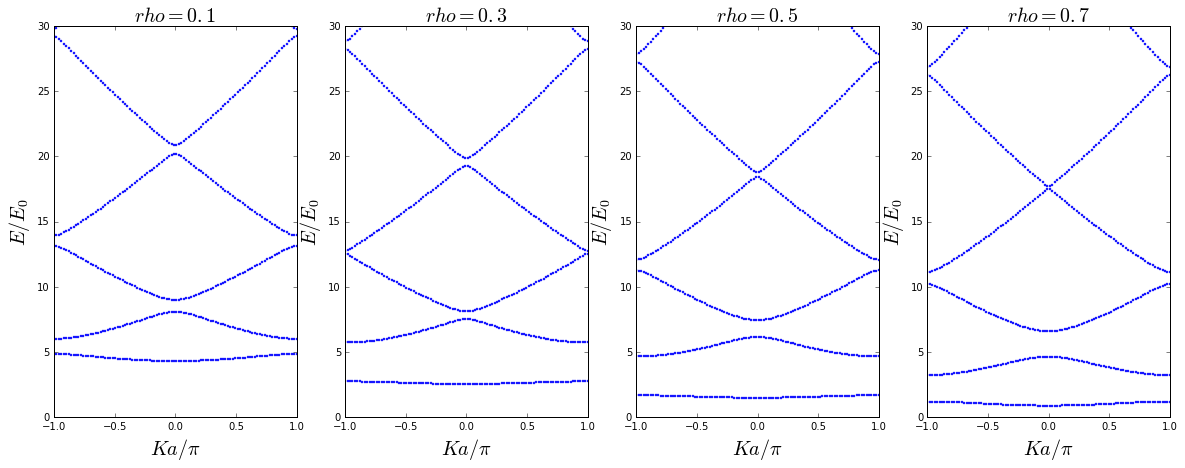

In [15]:
fig = figure(figsize=(20,7))
ax = fig.add_subplot(141)
bx = fig.add_subplot(142)
cx = fig.add_subplot(143)
dx = fig.add_subplot(144)

Ka_vals = 100
N = 10
v0 = 5
rhos = [0.1, 0.3, 0.5, 0.7]

Energies = [np.zeros((Ka_vals, 2*N+1)), np.zeros((Ka_vals, 2*N+1)), 
            np.zeros((Ka_vals, 2*N+1)), np.zeros((Ka_vals, 2*N+1))]
graphs = [ax,bx,cx,dx]

for i in range(4):
    Energies[i] = ParseKa(Ka_vals, N, v0, rhos[i])
    graphs[i].plot(Energies[i][0,:], Energies[i][1,:], '.', markersize=4)
    graphs[i].set_title("$rho = "+str(rhos[i])+"$", fontsize=20)
    graphs[i].set_ylim(0,30)
    graphs[i].set_xlabel("$Ka/\pi$", fontsize=20)
    graphs[i].set_ylabel("$E/E_0$", fontsize=20)

Notemos como las bandas se de energía se vas separando según el parámetro de ancho del pozo $\rho$.

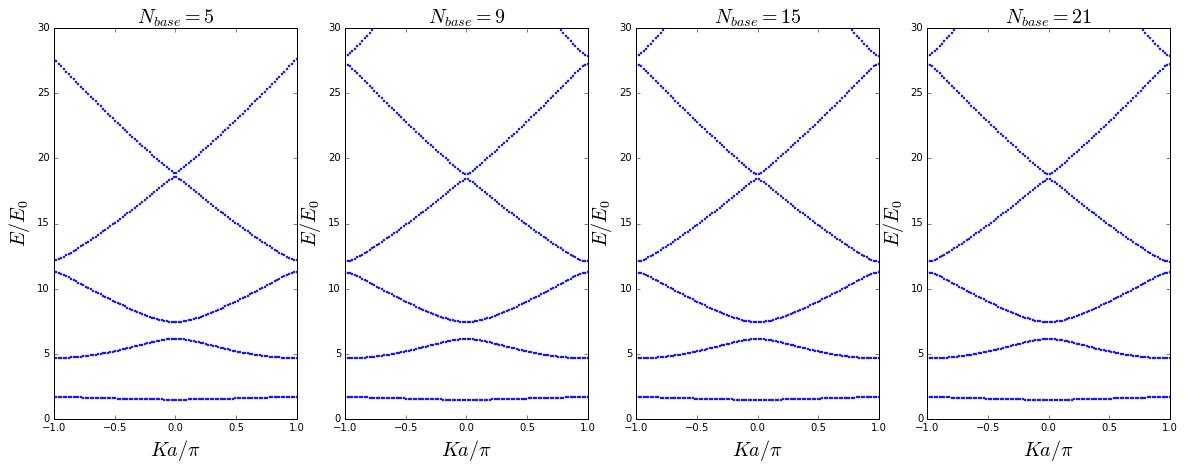

In [16]:
fig = figure(figsize=(20,7))
ax = fig.add_subplot(141)
bx = fig.add_subplot(142)
cx = fig.add_subplot(143)
dx = fig.add_subplot(144)

Ka_vals = 100
v0 = 5
rhos = 0.5
Ns = [2, 4, 7, 10]

Energies = []
for i in range(4):
    Energies.append(np.zeros((Ka_vals, 2*Ns[i]+1)))
graphs = [ax,bx,cx,dx]

for i in range(4):
    Energies[i] = ParseKa(Ka_vals, Ns[i], v0, rho)
    graphs[i].plot(Energies[i][0,:], Energies[i][1,:], '.', markersize=4)
    graphs[i].set_title("$N_{base} = "+str(2*Ns[i]+1)+"$", fontsize=20)
    graphs[i].set_ylim(0,30)
    graphs[i].set_xlabel("$Ka/\pi$", fontsize=20)
    graphs[i].set_ylabel("$E/E_0$", fontsize=20)